The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Exploratory Data Analysis

Let's consider the correlation between features.

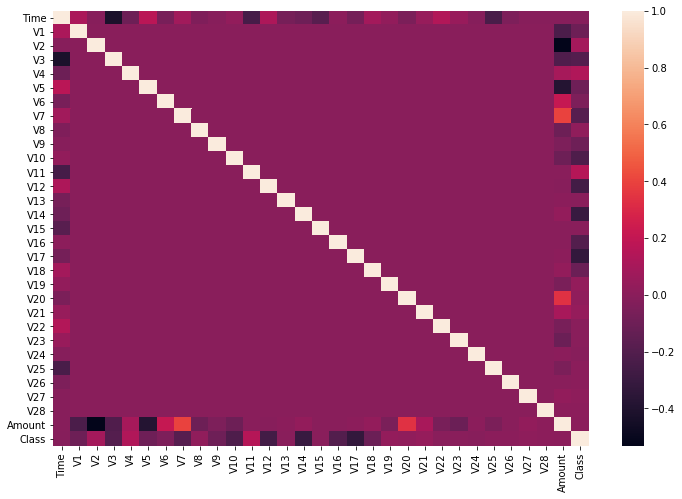

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

Consider the distribution of 'Time' and 'Amount' columns.

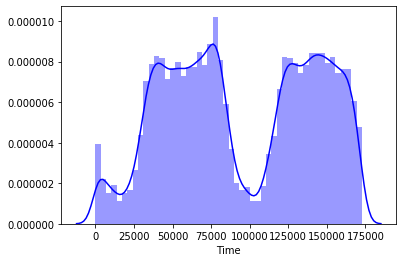

In [19]:
sns.distplot(df['Time'],color='blue')

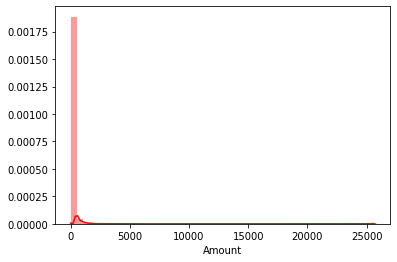

In [20]:
sns.distplot(df['Amount'],color='red',bins=50)

Since most of our data has already been scaled we should scale the remaining columns (Amount and Time).

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [29]:
df.drop(['Time','Amount'],axis=1,inplace=True)

In [47]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
281328,2.028593,-0.133317,-1.044217,0.535048,-0.174476,-0.455190,-0.492188,-0.057235,1.408708,-0.660317,...,0.630948,-0.015743,-0.722703,0.062769,-0.127004,0.054205,-0.018855,0,1.585391,-0.333599
74229,0.816082,-0.572549,0.658248,1.310412,-0.499799,0.785779,-0.314810,0.281397,0.589775,-0.181588,...,0.281627,-0.271085,-0.257059,0.567830,-0.260930,0.043595,0.036998,0,-0.828332,0.279748
128045,-0.283492,-2.398997,-1.009660,0.677098,-1.035407,-0.921402,1.392791,-0.464344,-0.498280,-0.282897,...,-0.396371,-0.777738,0.668658,0.195275,0.954889,-0.269429,0.122257,0,-0.341851,2.881022
244045,-0.041313,0.745576,-2.354993,-0.255617,0.670250,-0.955944,1.849325,-0.077970,-0.717409,-1.307731,...,0.504070,0.406668,0.532324,-0.157934,0.515446,-0.218919,-0.028413,0,1.208054,0.496684
264737,2.043593,0.204271,-1.747643,0.546355,0.185395,-1.462740,0.253024,-0.358818,0.619586,-0.516712,...,0.730140,-0.014382,-0.091916,0.229873,-0.097737,0.000204,-0.029538,0,1.405746,-0.331440


# Handling the Imbalanced Data

Since our classes are highly imbalanced we should make them equivalent in order to have a normal distribution of the classes.
Let's shuffle the data before creating the subsamples.

In [48]:
df = df.sample(frac=1)

# amount of fraud classes is 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=101)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
264012,2.033198,0.141216,-1.496378,0.544030,0.133666,-1.182861,0.179272,-0.252800,0.505062,-0.371129,...,-0.876379,0.404874,1.043787,-0.338397,0.140409,-0.064554,-0.025409,0,1.398439,-0.335278
46835,1.315362,-0.207586,-1.118486,-0.745058,1.934506,3.365860,-0.603665,0.830079,0.298760,-0.172062,...,-0.903861,0.028991,1.034757,0.484800,0.460971,-0.040978,0.003608,0,-1.092145,-0.337237
88307,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,-3.834775,...,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,1,-0.689307,0.366426
64460,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,-2.336584,-5.927359,...,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,1,-0.919365,0.046539
142405,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,-8.745973,...,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,1,-0.213103,-0.304013


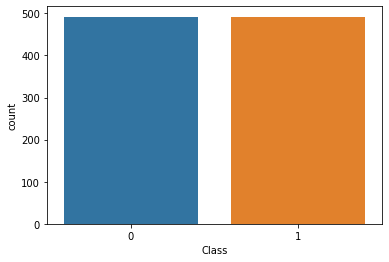

In [63]:
sns.countplot(new_df['Class'])

The correlation between features has changed.

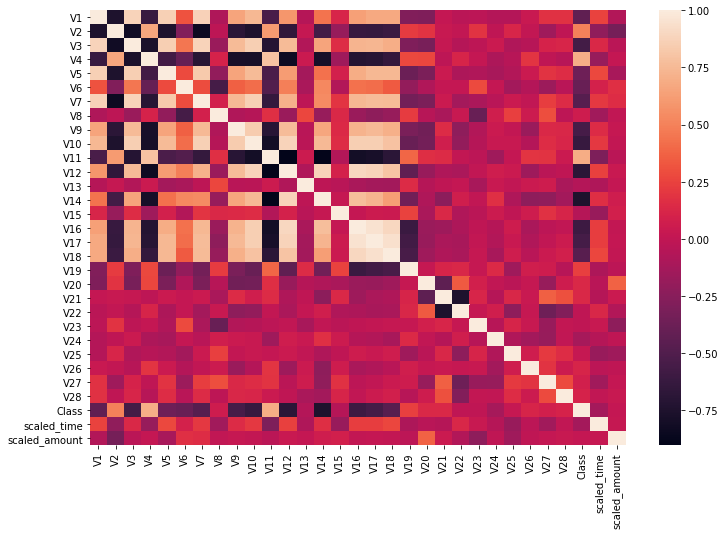

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(new_df.corr())

# Building a Neural Network Model

In [33]:
from sklearn.model_selection import train_test_split

In [51]:
X = new_df.drop('Class',axis=1).values
y = new_df['Class'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [73]:
X_train.shape

(738, 30)

Since X_train has 30 columns, we will take 30 neurons for the input layer. 
Then we will be reducing in half the number of neurons for each hidden layer.

In [66]:
model = Sequential()

model.add(Dense(30,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [67]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=25,
          validation_data=(X_test, y_test), 
          )

Train on 738 samples, validate on 246 samples
Epoch 1/25
738/738 [==============================] - 1s 2ms/sample - loss: 0.6595 - val_loss: 0.4618
Epoch 2/25
738/738 [==============================] - 0s 134us/sample - loss: 0.5354 - val_loss: 0.4175
Epoch 3/25
738/738 [==============================] - 0s 108us/sample - loss: 0.4866 - val_loss: 0.3892
Epoch 4/25
738/738 [==============================] - 0s 111us/sample - loss: 0.4359 - val_loss: 0.3614
Epoch 5/25
738/738 [==============================] - 0s 116us/sample - loss: 0.4157 - val_loss: 0.3338
Epoch 6/25
738/738 [==============================] - 0s 96us/sample - loss: 0.4033 - val_loss: 0.3133
Epoch 7/25
738/738 [==============================] - 0s 84us/sample - loss: 0.3533 - val_loss: 0.2926
Epoch 8/25
738/738 [==============================] - 0s 96us/sample - loss: 0.3496 - val_loss: 0.2730
Epoch 9/25
738/738 [==============================] - 0s 82us/sample - loss: 0.3190 - val_loss: 0.2568
Epoch 10/25
738/738 [===

# Evaluating Model Performance

In [68]:
losses = pd.DataFrame(model.history.history)

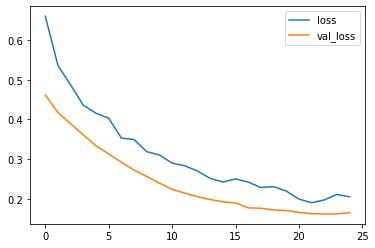

In [69]:
losses[['loss','val_loss']].plot()

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
predictions = model.predict_classes(X_test)

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       117
           1       0.94      0.92      0.93       129

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246



In [72]:
print(confusion_matrix(y_test,predictions))

[[110   7]
 [ 10 119]]


Let's see if a random credit card transaction is fraudulent or not.

We grab a random credit card transaction values.

In [60]:
import random
random.seed(101)
random_ind = random.randint(0,len(new_df))

new_cc = new_df.drop('Class',axis=1).iloc[random_ind]
new_cc

V1              -5.313774
V2               2.664274
V3              -4.250707
V4               0.394707
V5              -0.391383
V6               0.683526
V7              -5.133671
V8              -7.907790
V9               0.215475
V10             -2.297734
V11              1.961481
V12             -1.944441
V13             -0.692559
V14             -4.346348
V15             -1.726929
V16             -1.820405
V17             -3.746490
V18             -0.880399
V19              0.267915
V20             -2.642902
V21              8.664662
V22             -2.716383
V23              0.483559
V24              0.079235
V25              0.311065
V26              0.555544
V27              0.176740
V28              0.362907
scaled_time      0.711361
scaled_amount   -0.349231
Name: 189878, dtype: float64

We predict that this transaction is fraudulent.

In [61]:
model.predict_classes(new_cc.values.reshape(1,30))

array([[1]])

And it is actually fraudulent.

In [62]:
new_df.iloc[random_ind]['Class']

1.0